In [64]:
import seaborn as sns # for data visualization
import os
import pprint
import random
import statistics
import scipy.stats
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import json
import glob
%matplotlib inline

pp       =  pprint.PrettyPrinter(compact=True)

LOGFILES =  glob.glob('Atlas_kpi_Log_*.json')

print(LOGFILES)

#=== line colors and styles

linestyles = {
    # scenarios
    'empty':        'dotted',
    'canonical':    'dashed',
    'floorplan':    'solid',
}

linecolors = {
    # scenarios
    'empty':        '#262626',
    'canonical':    '#666666',
    'floorplan':    '#ff0000',
}

#=== helper functions

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return (m, h)

['Atlas_kpi_Log_210310090826.json']


In [65]:

#=== gather data

log = []
for logfile in LOGFILES:
    with open(logfile,'r') as f:
        for line in f:
            log += [json.loads(line)]
            
lastRunNum = None
runNums    = 0
for run in log:
    if run['runNums']!= lastRunNum:
        runNums      += 1
        lastRunNum    = run['runNums']
            
print('runNums: {} TotalRuns: {}'.format(runNums,len(log)))

runNums: 3 TotalRuns: 3


[[[0.77433295 0.77433295 0.77433295 1.        ]
  [0.94082276 0.94082276 0.94082276 1.        ]
  [0.19561707 0.19561707 0.19561707 1.        ]
  ...
  [0.77433295 0.77433295 0.77433295 1.        ]
  [0.94082276 0.94082276 0.94082276 1.        ]
  [0.97785467 0.97785467 0.97785467 1.        ]]

 [[0.77433295 0.77433295 0.77433295 1.        ]
  [0.94082276 0.94082276 0.94082276 1.        ]
  [0.19561707 0.19561707 0.19561707 1.        ]
  ...
  [0.77433295 0.77433295 0.77433295 1.        ]
  [0.94082276 0.94082276 0.94082276 1.        ]
  [0.97785467 0.97785467 0.97785467 1.        ]]

 [[0.77433295 0.77433295 0.77433295 1.        ]
  [0.94082276 0.94082276 0.94082276 1.        ]
  [0.19561707 0.19561707 0.19561707 1.        ]
  ...
  [0.77433295 0.77433295 0.77433295 1.        ]
  [0.94082276 0.94082276 0.94082276 1.        ]
  [0.97785467 0.97785467 0.97785467 1.        ]]

 ...

 [[0.77433295 0.77433295 0.77433295 1.        ]
  [0.94082276 0.94082276 0.94082276 1.        ]
  [0.19561

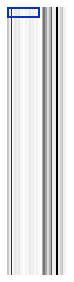

\newcommand{\heatmapMaxNumRobotsemptyAtlas}         {80\xspace}


In [70]:
'''
###############################################################################
Heatmap
###############################################################################
'''

#=== create plot

maxNumRobots = {}

plotsgenerated = []
for run in log:

    # shorthands
    if run['floorplanType'] == 0:
        scenarioName = 'empty'
    elif run['floorplanType'] == 1:
        scenarioName = 'canonical'
    elif run['floorplanType'] == 2:
        scenarioName = 'floorplan'
      
    navAlg = run['navAlgorithm']
    
    # don't plot same data twice
    if (
        ((scenarioName,navAlg) in plotsgenerated) or
        ('heatmap' not in run)
    ):
        continue
    
    # color cells visited
    data         = np.array(run['heatmap'])
    flat         = data.flatten()
    flat.sort()
    vmax         = flat[-2] # avoid counting num robots on start position
    maxNumRobots[(scenarioName,navAlg)] = vmax
    cmap         = plt.cm.Greys
    norm         = plt.Normalize(0, vmax)
    rgba         = cmap(norm(data))
    
    print(scenarioName,navAlg,vmax)
    
    # color real map
    realMap      = run['floorplanDrawing']
    x = 0
    for line in realMap.splitlines():
        if not line.startswith('#'):
            continue
        for (y,c) in enumerate(line):
            if   c=='#':
                rgba[x, y, :3] = ( 0/255,  51/255, 204/255)
        x += 1
    
    (fig,ax) = plt.subplots()
    im       = ax.imshow(rgba, interpolation='nearest')

    fig.tight_layout(pad=0, h_pad=0, w_pad=0)
    plt.axis('off')
#     fig.savefig(
#         os.path.join(
#             'plots',
#             'heatmap_{0}_{1}.eps'.format(
#                 scenarioName,
#                 navAlg,
#             ),
#         ),
#         bbox_inches='tight',
#     )
    plt.show()
    
    # remember what I have plotted
    plotsgenerated += [(scenarioName,navAlg)]

for ((scenarioName,navAlg),num) in maxNumRobots.items():
    print('\\newcommand{{\\heatmapMaxNumRobots{}{}}}         {{{}\\xspace}}'.format(scenarioName,navAlg,num))


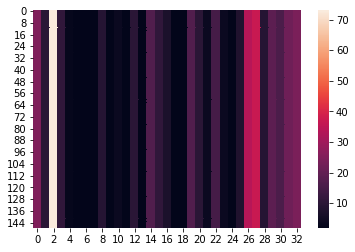

In [59]:


array_2d = run['heatmap']
sns.heatmap(array_2d)
